# Homework 6: Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: Vail Dorchester 

***

This assignment is due on Moodle by **5pm on Friday April 20th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/dblarremore/csci3022/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [243]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

### [15 points] Problem 1 - Hypothesis Testing: Find-the-Knowledge-Bug 
***

As part of your job as a seasoned data science consultant, companies often bring you in to supervise their less-experienced data science teams before new product roll-outs.  One one such occasion, you are hired by a medium-sized internet-sales company that is preparing to release a new line of smart-home products.  Prior to their product release the company wants to do a targeted ad campaign to drive traffic to their site on launch day. 

You are asked to pair-up and do some inference work with a new employee named Stevey McKnowsNoStats. At various points in your day you catch Stevey making the following mistakes.  In each case, clearly explain to Stevey why his testing setup or conclusion is incorrect. 

**Part A**: Stevey has pulled up some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the mean age of customers that visit the site.  Let $X$ be the random variable describing the age of a site visitor and suppose that the population mean for $X$ is $\mu$. In particular, Stevey wants to see if the data suggests that the mean age of their customers is under 30 years old.   He decides to perform the test with a null hypothesis of $H_0: \bar{x} = 30$. 

Here, Stevey is testing the sample mean, when he should be testing the population mean $\mu$. This is because he is interested in the value for all site visitors, not just the ones he pulled data on.

**Part B**: After the wonderful explanation you gave him after the previous debacle, Stevey has seen the error in his ways and decides instead to do his hypothesis test with a null hypothesis of $H_0: \mu < 30$.  

Now Stevey is testing the right parameter, but the null hypothesis should be something closer to: $H_o : \mu = 30$. What he has there should be his alternative hypothesis which is basically what he's testing for. He wants to know if the mean age is under thirty (alternate hypothesis) as opposed to whateve the mean currently is (null hypothesis).

**Part C**: Finally on track with reasonable hypotheses of $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a normalized test-statistic of $z = -1.35$ for the mean age and concludes that since $z = -1.35 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of their customers is less than 30.  

Well I mean it looks like he's maybe trying to do a P value test, but he's comparing the z-score to the significance level. He could compare the z-score to the z-score at the desired significance level, but this doesn't mean anything. They don't even have the same unitts.

**Part D**: This time, with the hypotheses again $H_0: \mu = 30$ and $H_1: \mu < 30$, Stevey computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

The p value is NOT the probability that the null hypothesis is true, so this is decidedly false. The p value is the probability of getting your sample given the null hypothesis is true. He could compare the p-value to the alpha value and see that his hypothesis actually is true, he's just not comparing the right values.

### [10 points] Problem 2 - Scientists vs. P-Values 
***

Read the following article from **FiveThirtyEight**: [Statisticians Found One Thing They Can Agree On: It's Time to Stop Misusing P-Values](http://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/). In what ways are scientists misusing p-values?  What suggestions are being made to use them properly? 

Apparently, many researchers blatantly misuse the p-value simply because they misunderstand it. Many use it in the way of manipulating their data to obtain a desired p-value via cherry picking data, running multiple tests, slicing the data in to specific groups (overfitting), or other biasing techniques. To combat this, some people have suggested coming up with a definition for the p-value that is more easily understood and other people have suggested augmenting the p-value to be more robust.

### [20 points] Problem 3 - Evaluating Pizza Delivery Performance 
***

The manager of a pizza chain with multiple locations likes to keep meticulous data on his pizza deliveries.  The data from more than 1200 deliveries in May 2014 is stored in pizza.csv. 

In [3]:
np.random.seed(1235)
dfP = pd.read_csv("data/pizza.csv")

In [4]:
dfP.head(20)

,day,date,time,operator,branch,driver,temperature,bill,pizzas
0,Thursday,01-May-14,33.708636,Laura,East,Bruno,71.433084,58.4,4
1,Thursday,01-May-14,29.382070,Melissa,East,Salvatore,64.952920,26.4,2
2,Thursday,01-May-14,33.580664,Melissa,West,Salvatore,49.113452,58.1,3
3,Thursday,01-May-14,32.505369,Melissa,East,Salvatore,64.872559,35.2,3
4,Thursday,01-May-14,25.493613,Melissa,West,Salvatore,59.630052,38.4,2
5,Thursday,01-May-14,21.727466,Melissa,Centre,Bruno,53.715391,61.8,4
6,Thursday,01-May-14,38.394169,Laura,West,Bruno,60.266862,57.9,3
7,Thursday,01-May-14,22.186179,Melissa,West,Mario,61.187654,35.8,2
8,Thursday,01-May-14,35.324994,Laura,Centre,Mario,64.204093,36.6,2
9,Thursday,01-May-14,34.015280,Melissa,Centre,Bruno,67.383452,44.8,5


**Part A**: The manager's goal is to have an average delivery time across all branches of less than 30 minutes.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

Null hypothesis: $H_o : \mu = 30$<br>
Alternative Hypothesis: $H_1 : \mu < 30$ <br>
Basically I did a one sided z test using the p-value. I just calculated the z-score for the sample mean and then used that in the scipy.stats.norm function to get the p value and compared that to the alpha valu 0.05

In [41]:
#defining stuff
mu_o = 30 #null hypothesis
alpha = 0.05 #alpha value
n = dfP.shape[0] #number of samples
pop_mean = dfP["time"].mean() #population mean from CLT
z = 1.645 #z of our alpha value
std = dfP["time"].std() #standard deviation

#Getting the z score for the sample mean
z_test_statistic = (pop_mean - mu_o)/(std/(n**0.5))

In [115]:
p_val = stats.norm.cdf(-abs(z_test_statistic))
print("P Value: {0:.4} Alpha Value: {1:.4}".format(p_val, alpha))

P Value: 0.000759 Alpha Value: 0.05


The alternative hypothesis is true because the p-value is less than the significance threshold of 0.05. The p-value is 0.000759, which means that, assuming the null hypothesis is true, there is only a 0.076% chance that we obtain the data we have, so this is likely not due to chance.

**Part B**: The manager also has the goal of having an average delivery temperature across all branches of greater than 65F.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypothesis, describe your testing procedure, and show all calculations in Python. 

Null hypothesis: $H_o : \mu = 65F$<br>
Alternate hypothesis: $H_1 : \mu > 65F$<br>
Again I used a single tail Z test and the p value. I calculated the z-score for mean pizza temp and used that to find the p-value and compare it to the significance threshold.

In [114]:
#defining
null_mean = 65
alpha = 0.05
n = dfP.shape[0]
sample_mean = dfP["temperature"].mean()
z = 1.645
std = dfP["temperature"].std()

#test statistic
b_z_test_stat =  (sample_mean - null_mean)/(std/(n**0.5))

#get p-value
b_p_val = stats.norm.cdf(-abs(b_z_test_stat))

#print results
print("P Value: {0:.4} Alpha Value: {1:.4}".format(b_p_val, alpha))

P Value: 0.08347 Alpha Value: 0.05


The data given is not sufficient to reject the null hypothesis. We cannot say with confidence that the average pizza temperature is actually above 65F because the p-value of 0.08 is greater than the confidence threshold.

**Part C**: The manager has enough money to give one of his delivery drivers a raise based on good performance. He knows from the data that his two best drivers are Mario and Luigi, but he's not sure if there is evidence that either one is better than the other.  Using delivery time and temperature as the criteria, perform any necessary hypothesis tests at the $\alpha = 0.05$ significance level, to determine if one of the drivers deserves a raise. Be sure to clearly describe your hypotheses and methodology, and show any relevant computations in Python. 

Basically, I will conduct two z-tests. I will compare the mean time and temperature using the null hypothesis that the difference in means is zero, and alternative hypothesis that the differences are not zero. Using the z-test, I will not only learn if there is a difference in means, but which mean is higher. I will then be able to know if one of the drivers performs better than the other. If the z_score test statistic is zero or close to it, that means there is not a significant difference in the two values. If the test statistic is lower than $-Z_{\frac{\alpha}{2}}$, then, because I have subtracted Luigi's means from Mario's means, that shows that we can confidently say that Luigi's mean is higher. If the test statistic is greater than $Z_{\frac{\alpha}{2}}$, then we can confidently say that Mario's mean is higher.<br><br>
<b>For the time test:</b><br>
Null hypothesis: $H_o : \mu_m - \mu_l = 0$<br>
Alternate hypothesis: $H_o : \mu_m - \mu_l \neq 0$<br><br>
<b>For the temperature test:</b><br>
Null hypothesis: $H_o : \mu_m - \mu_l = 0$<br>
Alternate hypothesis: $H_o : \mu_m - \mu_l \neq 0$<br>

In [73]:
#data stuff
null_mean = 0
alpha = 0.05
z2 = 1.96

#get data
mario = dfP.loc[dfP.driver=="Mario"]
luigi = dfP.loc[dfP.driver=="Luigi"]

#counts
n_m = mario.shape[0]
n_l = luigi.shape[0]

#means
mean_mario_time = mario["time"].mean()
mean_luigi_time = luigi["time"].mean()
mean_mario_temp = mario["temperature"].mean()
mean_luigi_temp = luigi["temperature"].mean()

#standard deviations
std_mario_time = mario["time"].std()
std_luigi_time = luigi["time"].std()
std_mario_temp = mario["temperature"].std()
std_luigi_temp = luigi["temperature"].std()

#get z scores for both time and temp
z_time = (mean_mario_time - mean_luigi_time)/((((std_mario_time**2)/(n_m))+((std_luigi_time**2)/(n_l)))**0.5)
z_temp = (mean_mario_temp - mean_luigi_temp)/((((std_mario_temp**2)/(n_m))+((std_luigi_temp**2)/(n_l)))**0.5)

#print them i guess
print("Z value: +- {0}".format(z2))
print("Z value for time: {0:.5}".format(z_time))
print("Z value for temp: {0:.5}".format(z_temp))

Z value: +- 1.96
Z value for time: 0.0043662
Z value for temp: -0.95654


These hypothesis tests show that we were not able to reject the null hypotheses, and their average delivery time and temperatures are likely very similar. I guess just split the bonus between the two best drivers?

**Part D**: On the other hand, the manager suspects that Salvatore has been underperforming as a driver.  The manager has a policy that if a pizza takes 40 minutes or longer to be delivered, he has to fork over a free bottle of wine.  This policy is only financially viable for the pizza chain if they have give out free wine on less than 5% of all pizza deliveries.  Perform a hypothesis test at the $\alpha = 0.05$ significance level to determine if there is significant evidence that the proportion of Salvatore's deliveries that take longer than 40 minutes is greater than 5%.  

This seems to be a one-tailed test. I'm going to make the null hypothesis that the proportion of deliveries over 40 minutes is 0.05, and the alternate hypothesis that that same proportion is greater than 0.05. I will then use a single tailed z test with p values to determine if this is true.<br><br>
Null Hypothesis: $H_o : p = 0.05$<br>
Alternate Hypothesis: $H_1 : p > 0.05$

In [113]:
#AHHHHHHH
alpha = 0.05
salv = dfP.loc[dfP.driver=="Salvatore"] #get this dudes stuff
null_pr = 0.05 #null hyp proportion
num_slow_del = dfP.loc[dfP.time>=40].shape[0] #how many slow deliveries
n = salv.shape[0] #how many deliveries he's done
pr = num_slow_del/n #proportion of slow deliveries
std = ((0.05)*(0.95))/(n) #variance
std = std**0.5 #std
z = (pr - null_pr)/(std)
p = stats.norm.cdf(-abs(z))
print("P value: {0:.4} Alpha val: {1:.4}".format(p, alpha))

P value: 5.215e-13 Alpha val: 0.05


It may be in the manager's best interest to fire Salvatore. We can say with confidence that over 5% of his deliveries take longer than 40 minutes. 

### [15 points] Problem 4 - Naps vs Coffee for Memory? 
***

The consumption of coffee to benefit alertness is a common activity practiced by 90% of adults in North America. Often coffee is used to replace the need for sleep. One recent study compares students’ ability to recall memorized information after either the consumption of coffee or a brief nap. A random sample of 24 adults
were randomly divided into two groups and verbally given a list
of 25 words to memorize. During a break, one of the groups took a nap for an hour and a half,
another group stayed awake and were given a coffee an hour prior to testing. Researchers measured the number of words participants were
able to recall following the break. The summary statistics for the two groups are shown below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Nap} & 12 & 15.5 & 3.2 \\ 
\textrm{Coffee} & 12 & 12.25 & 3.1 \\ 
\end{array}
$$

In previous experiments the mean recall measurement was found to be normally distributed. 

**Part A**: Compute a 95% t-confidence interval for the mean recall measurement for participants that took a nap before the test. Do all computations in Python. 

In [285]:
alpha = 0.05
t = stats.t.ppf(0.975, 11)
n = 12
std = 3.2
interval = t*((std)/(n**0.5))
mean = 15.5
print("95% confidence interval for the mean recall of the\nnap group is {0} +- {1:.4}".format(mean, interval))

95% confidence interval for the mean recall of the
nap group is 15.5 +- 2.033


**Part B**: Is there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes better memory recall that drinking coffee?  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python. 

Null Hypothesis: $H_o : \mu_n - \mu_c = 0$<br>
Alternate Hypothesis: $H_1 : \mu_n - \mu_c > 0$

In [94]:
z = 1.645
alpha = 0.05
null_mean = 0
mean_n = 15.5
mean_c = 12.25
std_n = 3.2
std_c = 3.1
n = 12
test_stat = (mean_n - mean_c)/(((std_n**2 / n)+(std_c**2 / n))**0.5)
p = stats.t.cdf(-test_stat, 23)
print("P value: {0:.4} Alpha value: {1:.4}".format(p, alpha))

P value: 0.009419 Alpha value: 0.05


The given data is sufficient to reject the null hypothesis and say that napping is better for recall than coffee.

**Part C**: Compute a 95% confidence interval for the standard deviation of memory recall for coffee drinkers. Do all computations in Python.  

In [97]:
r = stats.chi2.ppf(0.025, 11)
l = stats.chi2.ppf(0.975, 11)
var = 3.1**2
std = 3.1
low = (var*11)/(l)
high = (var*11)/(r)
low = low**0.5
high = high**0.5
print("95% Confidence interval for standard deviation of \ncoffee drinkers is [{0:.4}, {1:.4}]".format(low, high))

95% Confidence interval for standard deviation of 
coffee drinkers is [2.196, 5.263]


### [20 points] Problem 5 - Bad Science for Fun and Profit 
***

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Johnny Nefarious has landed his first data science internship at an online marketing firm.  His primary summer project has been to design and test a new email advertisement for his company's best-selling product. To test his advertisement his supervisors have allowed him to send his ad to 4 targeted customer groups of 50 people every day for a month. 

The effectiveness of online advertising is typically measured by the ad's [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) (CTR), which is defined to be the _proportion_ of users that click on an advertisement. The company's standard email advertisement has a CTR of $0.05$.  Johnny is hoping to land a permanent position at the company when he graduates, so he's **really** motivated to show his supervisors that the CTR of his email advertisement is a (statistically) significant improvement over their previous ad. 

The data from Johnny's summer experiment can be found in email.csv. Load this dataset into Pandas. 

In [148]:
dfAd = pd.read_csv("data/email.csv")
dfAd.head(20)

,Group,Date,Sent,Clicked
0,1,NaN,50,1
1,1,Oct 2 2017,50,2
2,1,Oct 3 2017,50,4
3,1,NaN,50,5
4,1,Oct 5 2017,50,1
5,1,Oct 6 2017,50,3
6,1,NaN,50,2
7,1,NaN,50,1
8,1,Oct 9 2017,50,2
9,1,NaN,50,2


**Part A**: State the null and alternate hypotheses that Johnny should test to see if his ad campaign is an improvement over the company's standard mailer with a CTR of $0.05$. 

Null: $H_o : CTR = 0.05$<br>
Alternate: $H_1 : CTR > 0.05$

**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.05$ significance level using a p-value test. Is there sufficient evidence for Johnny to conclude that his ad campaign is an improvement?   

In [119]:
n = dfAd.shape[0] #get n
proportions = dfAd.Clicked / dfAd.Sent #get series of proportions
pr = proportions.mean() #get mean proportion
null_pr = 0.05 #get null proportion
std = ((0.05*0.95)/(n))**0.5
z = (pr - null_pr)/std #calculate z value
p = stats.norm.cdf(-abs(z)) #get p value
alpha = 0.05
print("P value: {0:.4} Alpha value: {1:.4}".format(p, alpha))

P value: 0.4573 Alpha value: 0.05


We do not have sufficient data to say that Johnny's mean CTR is actually any better at all

**Part C**: Bummer, Johnny thinks. This is the part where he decides to resort to some questionable science.  Maybe there is a reasonable subset of the data for which his alternative hypothesis is supported?  Can he find it?  Can he come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Johnny cannot modify the original data (e.g. by adding nonexistent clicks to certain groups or days) because his boss will surely notice.  Instead he needs to find a subset of the data for which his hypothesis is supported by a p-value test at the $\alpha = 0.05$ significance level _and_ be able to explain to his supervisors why his sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

In [149]:
dfAd.head()

,Group,Date,Sent,Clicked
0,1,NaN,50,1
1,1,Oct 2 2017,50,2
2,1,Oct 3 2017,50,4
3,1,NaN,50,5
4,1,Oct 5 2017,50,1


In [197]:
g=3
df = dfAd.loc[(dfAd.Group==g) & (dfAd.Clicked>2)]
dat = df.dropna().Clicked/ df.dropna().Sent
#dat = df.Clicked / df.Sent
pr2 = dat.mean()
print(pr)
print(pr2)
df.shape[0]

0.05209677419354832
0.08888888888888889


13

Here I am just doing a simple z test using p values on johnny's selected subset.

In [203]:
n = dfAd.shape[0] #get n
proportions = dfAd.Clicked / dfAd.Sent #get series of proportions
pr = proportions.mean() #get mean proportion
null_pr = 0.05 #get null proportion
std = ((0.05*0.95)/(n))**0.5
z = (pr2 - null_pr)/std #calculate z value
p = stats.norm.cdf(-abs(z)) #get p value
alpha = 0.05
print("P value: {0:.4} Alpha value: {1:.4}".format(p, alpha))

P value: 0.02346 Alpha value: 0.05


I was only able to pass this hypothesis test by using the subgroup of only group 3 with all rows with missing values dropped and only counting days with more than two clicks. The last bit is what finally made the test work, and that's completely invalid to do, but I imagine you could probably get away with explaining it by saying you only wanted to analyze the days that were above the current mean which was 2.6, and that you dropped missing date values because missing values are bad. So yeah this is not valid at all.

### [20 points] Problem 6 - Simple Linear Regression for Gas Mileage 
***

The data in auto.csv contains information on cars from the 1970s and 1980s. In this exercise you will construct a simple linear regression model for the response variable mpg with horsepower as the feature. Load the data into a Pandas DataFrame.    


In [207]:
dfAuto = pd.read_csv("data/auto.csv")
dfAuto.head()

,model,year,mpg,cylinders,horsepower,weight
0,chevrolet chevelle malibu,70,18.0,8,130.0,3504.0
1,buick skylark 320,70,15.0,8,165.0,3693.0
2,plymouth satellite,70,18.0,8,150.0,3436.0
3,amc rebel sst,70,16.0,8,150.0,3433.0
4,ford torino,70,17.0,8,140.0,3449.0


**Part A**: Perform a simple linear regression with horsepower as the feature and mpg as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

In [260]:
import sklearn
from sklearn import linear_model

x = dfAuto.horsepower
y = dfAuto.mpg
x_avg = x.mean()
y_avg = y.mean()
beta = np.sum((x - x_avg)*(y - y_avg))/np.sum((x - x_avg)**2)
alpha = y_avg - beta*x_avg
print("Y = {0:.4} + {1:.4}x".format(alpha, beta))

Y = 39.94 + -0.1578x


**Part B**: Make a scatter-plot of the data with horsepower as the feature and mpg as the response and overlay the estimated regression line. 


Text(0.5,1,'Horsepower vs mpg')

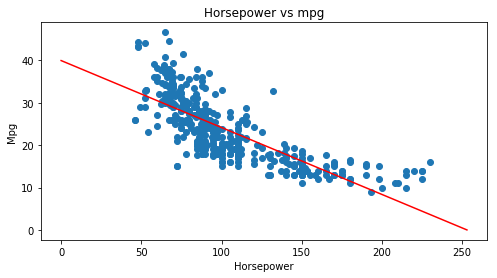

In [265]:
x_int = -alpha/ beta
fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(x, y)
plt.plot([0, x_int], [alpha, 0], 'r')
ax.set_xlabel("Horsepower")
ax.set_ylabel("Mpg")
ax.set_title("Horsepower vs mpg")

**Part C**: Is the relationship between horsepower and mpg positive or negative? Justify your response. 

In [264]:
c = np.corrcoef(x, y)[0][1]
print("The correlation coefficient is: {0:.5}".format(c))

The correlation coefficient is: -0.77843


Well the correlation coefficient is pretty negative, the beta value is negative, and the overall graph tends y decreasing as x increases, so it's a negative relationship. You could say that horespower and mpg are inversely proportional.

**Part D**: Find a 95% confidence interval for the slope parameter.  Based on this confidence interval, is there sufficient evidence to believe, at the 95% confidence level, that there is a real relationship between horsepower and mpg? 

In [300]:
z = 1.96
mx = beta*x
yp = alpha + mx
diff = y - yp
sse = np.sum((diff)**2)
std = sse/(dfAuto.shape[0] - 2)
std = std**0.5
t = stats.t.ppf(0.025, dfAuto.shape[0]-1)
interval = t*std
print("Confidence interval: {0:.4} +- {1}".format(beta, interval))

Confidence interval: -0.1578 +- -79.20781383551623


**Part E**: Double-check your result from **Part D** by performing an equivalent hypothesis test.  Be sure to state your null and alternative hypotheses and explain your general methodology.  Do your conclusions agree with those made in **Part D**? 

Null: $H_o : \beta = 0$<br>
Alternate: $H_1 : \beta \neq 0$

In [308]:
alpha = 0.05
stat = (beta - 0)/(std)
p = stats.norm.cdf(stat, dfAuto.shape[0]-1)
print("P value: {0:.4} Alpha: {1:.4}".format(p, alpha))
print(stat)

P value: 0.0 Alpha: 0.05
-0.00391792895622166


P value is 0, so we can reject the null hypothesis and say there is a relationship between horsepower and mpg.

**Part F**: What gas mileage would your simple linear regression model predict for a car with a horsepower of $97$? 

In [267]:
mileage = alpha + beta*(97)
print(mileage)

24.624921885866065


It would expect about 24.6 mpg

In [276]:
mpg = mod.predict(97)
print(mpg[0][0])

24.6249218859
